# Tarea 1
### Ejercicio 1

## Jonathan Alexis Urrutia Anguiano       41401102-5

In [1]:
from pylab import*
%matplotlib inline

### Realizar los siguintes métodos con explicación

1.- Euler

2.- Taylor hasta 2do orden

3.- Runge-Kutta de 2do orden

4.- Runge-Kutta de 4to orden

Además para comporobar los métodos se resolverá la siguiente ecuación
$$\ddot x +\frac{1}{2}\dot x +\sin(x) = e^{-t}\sin(3t)$$
con las condiciones $\dot x(0) = 1 \mbox{ y } x(0)=0$

Para esto es necesario escribirla como una ecuación de primer orden, es decir, con estos cambios de variables

\begin{align}
  u_1 &= x,    \\
u_2 &= \dot x,             
\end{align}
 resolver 
\begin{align}
 u_1' &= \dot x = u_2 \\
u_2' = \ddot x &= -\sin(u_1) -\frac{1}{2} u_2+ e^{-t}\sin(3t)
\end{align}

Se puede además carlcular la derivada del sistema de ecuaciones respecto del tiempo y el jaconiano, que serán utilizados más adelante para el método de Taylor de 2do orden:
\begin{align}
\frac{d\vec u}{dt} =\left(\begin{array}{c} 0\\ e^{-t}(-\sin(3t)+3\cos(3t))\end{array}\right) 
\;\;\; \mathbb{J} = \left(\begin{array}{c c} 0 & 1 \\ -\cos(u_1) & -\frac{1}{2}    \end{array}\right) 
\end{align}

In [2]:
def ecDif(y,t):
    return array([y[1],-sin(y[0])-0.5*y[1]+exp(-t)*sin(3*t)])

def d_ecDif(y,t):
    return array([0,exp(-t)*(-sin(3*t)+3*cos(3*t))]), array([[0,1],[-cos(y[0]),-0.5]])  

### Método de Euler

Este método resulve las ecuaciones diferenciales de la forma $f(x,y)=y'$. sabemos que

$$
f(x,y)=y'=\lim_{h \to 0} \frac{y(x+h)-y(x)}{h}
$$

Es posible entonces calcular de forma aproximada la función $y$ en intervalos de h mediante la siguiente fórmula:

$$y_{i+1} = y_i + h f(y_i,x_i)$$

In [3]:
def euler(func, x_0,intervalo,h=0.01):
    tiempo = arange(intervalo[0],intervalo[1]+h,h) #Hace un arreglo con el punto inicial, hasta el final en pasos de h
    y = zeros((len(tiempo),len(x_0))) #Vector de dos entradas en donde cada una es una lista, una de los tiempos, otra para los puntos iniciales
    y[0,:] = x_0
    for i in xrange(len(tiempo)-1): #Se detiene uno antes de acabar
        y[i+1,:] = y[i,:]+ h* func(y[i,:],tiempo[i])
    return tiempo, y

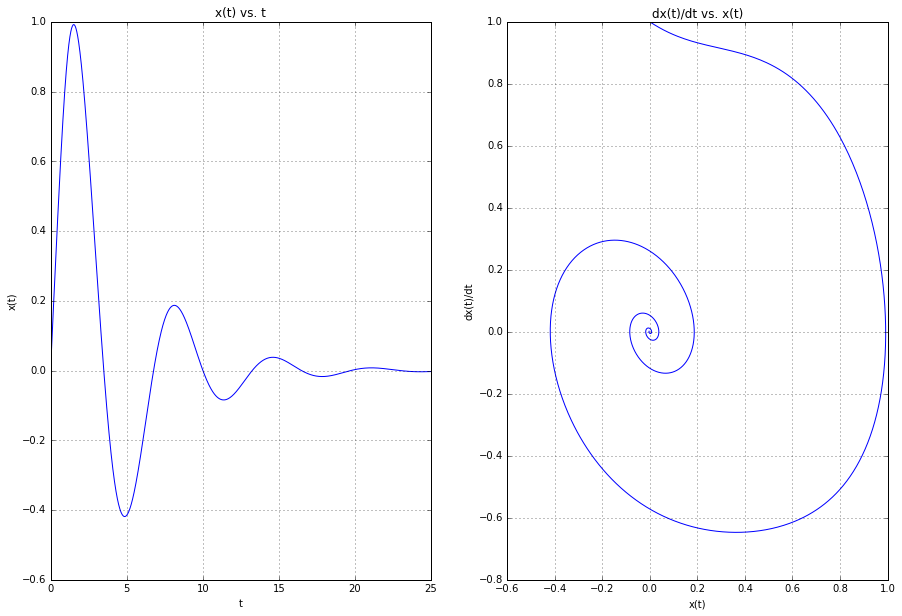

In [4]:
tE, solE = euler(ecDif,[0,1],[0,25])
fig, ax = plt.subplots(figsize=(15, 10))
subplot(121)
grid(True)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
plot(tE,solE[:,0])

subplot(122)
grid(True)
title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
plot(solE[:,0],solE[:,1])
show()

### Método de Taylor de 2do orden

Recordando que dada la ecuación diferencial de la forma $f(x,y)=y'(x)$, es posible conocer a $y$ en su expanción en serie de Taylor al rededor de un punto mediante la expresión siguiente
\begin{align}
y(x_i+h) &\approx y(x_i) + h \frac{dy}{dt}(x_i) + \frac{h^2}{2!}  \frac{d^2y}{dt^2}(x_i)\\
        &=  y(x_i) + h f(x_i,y_i) + \frac{h^2}{2!}\left[\frac{\partial f}{\partial t} +\frac{\partial f}{\partial y} f \right](x_i,y_i)
\end{align}
La primera ecuación es la serie de Taylor de $y$ expandida al rededor de $h$ y cortada en el tercer término. La segunda expresión en el término lineal usa la ecuación diferencial que se desea resolver y en el término de segundo orden se utiliza regla de la cadena donde
\begin{align}
\frac{d^2y}{dt^2} &= \frac{d}{dt}\left( \frac{df}{dt}\right)\\
                   &= \frac{d}{dt}\left( f \right)\\
                    &= \frac{\partial f}{\partial t}  \frac{dt}{dt}+\frac{\partial f}{\partial y}  \frac{dy}{dt}\\
                    &= \frac{\partial f}{\partial t} +\frac{\partial f}{\partial y} f
\end{align}
Nótese además que si se truncase la suma en el término lineal, lo que se obtiene es el método de Euler.

La forma más general de este método es la siguiente:
$$
\vec y_{n+1} = \vec y_n + h\vec f + \frac{1}{2}h^2 \left( \frac{\partial \vec f}{\partial x} +\mathbb{J}\vec f \right)
$$
donde $\vec f$ es $\vec f(x_n,\vec y_n)$, $\mathbb{J}$ es el jacobiano de $f$ evaluado en $(x_n,\vec y_n)$, y el orden del error es de $O(h^2)$.

In [5]:
def taylor2(func,d_func, x_0,intervalo,h=0.01):
    tiempo = arange(intervalo[0],intervalo[1]+h,h)
    y = zeros((len(tiempo),len(x_0))) 
    y[0,:] = x_0
    for i in xrange(len(tiempo)-1): 
        f = func(y[i,:],tiempo[i])   
        df,jac = d_func(y[i,:],tiempo[i])
        y[i+1,:] = y[i,:]+ h*f+ 0.5*(h**2)*(df+dot(jac,f))
    return tiempo, y

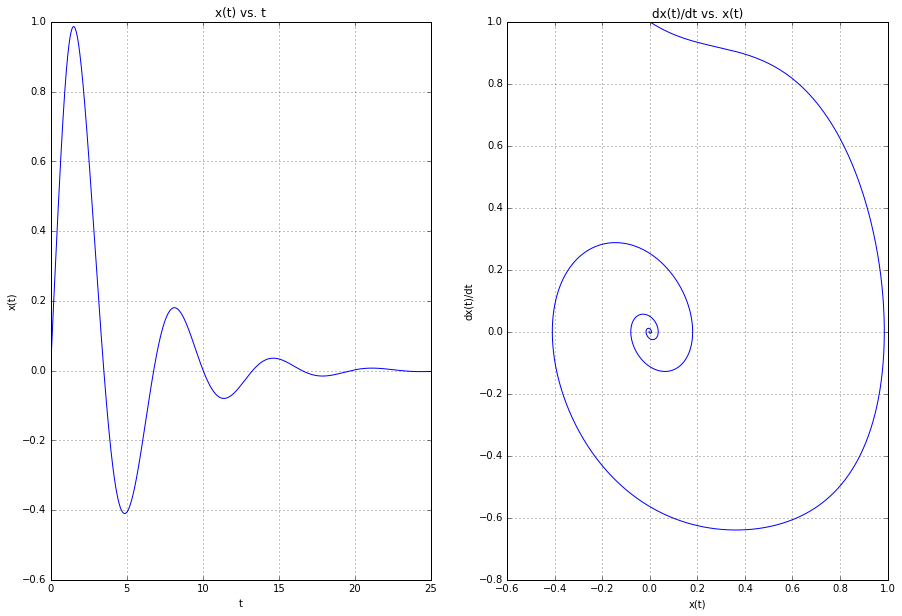

In [6]:
tT, solT = taylor2(ecDif,d_ecDif,[0,1],[0,25])
fig, ax = plt.subplots(figsize=(15, 10))
subplot(121)
grid(True)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
plot(tT,solT[:,0])

subplot(122)
grid(True)
title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
plot(solT[:,0],solT[:,1])
show()

## Runge-Kutta de 2do Orden

Desarrollandoa $y_{i+1}$ en serie de Taylor y truncando hasta el tercer término se tiene que
\begin{align}
y(x_i+h) &=  y(x_i) + h f(x_i,y_i) + \frac{h^2}{2}\left[\frac{\partial f}{\partial t} +\frac{\partial f}{\partial y} f \right](x_i,y_i)\\
        &= y(x_i) + \frac{h}{2} f(x_i,y_i) +\frac{h}{2} \left[f(x_i,y_i)+h \frac{\partial f}{\partial t}(x_i,y_i) +h\frac{\partial f}{\partial y}(x_i,y_i)\, f(x_i,y_i) \right]
\end{align}

Ahora recordemos la expanción de Taylor en más de un argumento de una función $f=f(x,y)$
\begin{align}
f(x + h_X, y+ h_y) \approx f(x, y) + h_x \frac{\partial f}{\partial t}(t, y) + h_y \frac{\partial f}{\partial y}(x, y)
\end{align}

entonces definiendo $h_y\to h f(x_i,y_i)$ enla expansión de $y(x_i+h)$, es posible reescribirla como
\begin{align}
y(x_i+h) &=  y(x_i) + \frac{h}{2} f(x_i,y_i) +\frac{h}{2} f(x_i+h,y_i+ h f(x_i,y_i) ) 
\end{align}

Para comprender la expresión más claramente, se hará el código de la siguiente manera

\begin{align}
k_1 &= f(x_i,y_i) \\
k_2 &= f(x_i+h,y_i+ h k_1)\\
y(x_i+h) &=  y(x_i) +h \left(\frac{1}{2} k_1  +\frac{1}{2} k_2\right) 
\end{align}


In [7]:
def rk2(func, x_0, intervalo ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h) #Hace un arreglo con el punto inicial, hasta el final en pasos de h
    y = zeros((len(tiempo),len(x_0))) #Vector de dos entradas en donde cada una es una lista, una de los tiempos, otra para los puntos iniciales
    y[0,:] = x_0
    for i in xrange(len(tiempo)-1):
        k1 = func(y[i,:],tiempo[i])
        k2 = func(y[i,:]+h*k1,tiempo[i]+h)
        y[i+1,:]= y[i,:]+0.5*h*(k1+k2)
    return tiempo, y

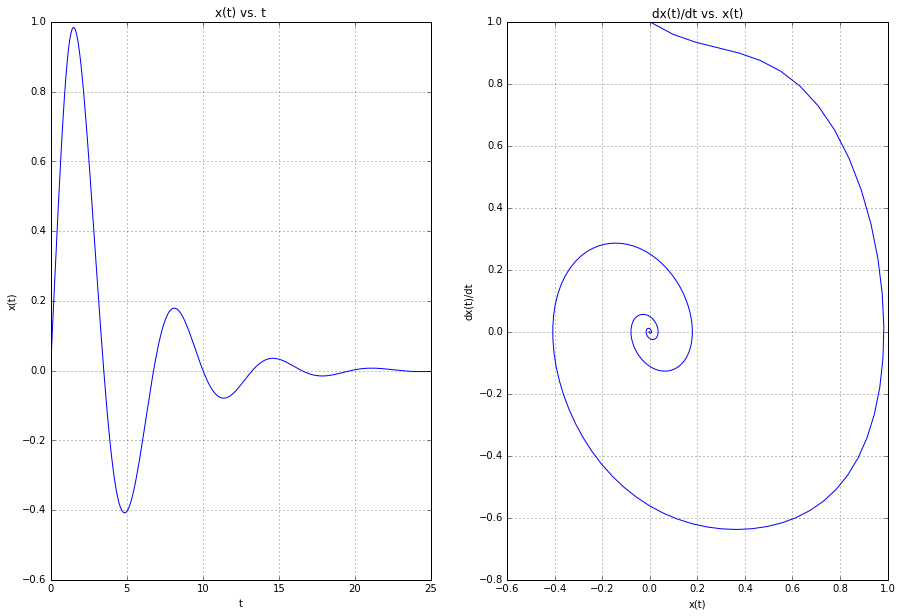

In [8]:
tRK2, solRK2 = rk2(ecDif,[0,1],[0,25])
fig, ax = plt.subplots(figsize=(15, 10))
subplot(121)
grid(True)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
plot(tRK2,solRK2[:,0])

subplot(122)
grid(True)
title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
plot(solRK2[:,0],solRK2[:,1])
show()

### Runge-Kutta de 4to Orden

Para este método se examina la expansión en series de Taylor para $f=f(x,y)$. Una de las sluciones y la encontrnada en muchos libros es la siguiente

\begin{align}
k_1 &= f(x_i,y_i) \\
k_2 &= f(x_i+\frac{h}{2}, y_i+\frac{h}{2}k_1)\\
k_3 &= f(x_i+\frac{h}{2}, y_i+\frac{h}{2}k_2)\\
k_4 &=f(x_i+h, y_i+k_3h)\\
y(x_i+h) &=  y(x_i) +\frac{h}{6}(k_1+2k_2+2k_3+k_4)
\end{align}

In [9]:
def rk4(func, x_0, intervalo ,h=0.1):
    tiempo = arange(intervalo[0],intervalo[1]+h,h) #Hace un arreglo con el punto inicial, hasta el final en pasos de h
    y = zeros((len(tiempo),len(x_0))) #Vector de dos entradas en donde cada una es una lista, una de los tiempos, otra para los puntos iniciales
    y[0,:] = x_0
    for i in xrange(len(tiempo)-1):
        k1 = func(y[i,:],tiempo[i])
        k2 = func(y[i,:]+0.5*h*k1,tiempo[i]+0.5*h)
        k3 = func(y[i,:]+0.5*h*k2,tiempo[i]+0.5*h)
        k4 = func(y[i,:]+h*k3,tiempo[i]+h)
        y[i+1,:]=y[i,:]+(h/6.)*(k1+2*k2+2*k3+k4)
    return tiempo,y

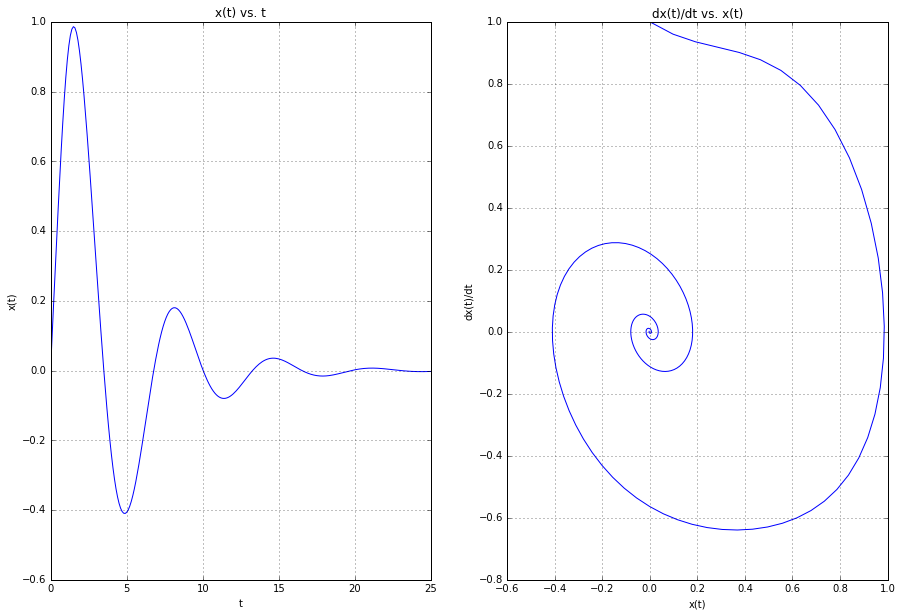

In [11]:
tRK4, solRK4 = rk4(ecDif,[0,1],[0,25])
fig, ax = plt.subplots(figsize=(15, 10))
subplot(121)
grid(True)
title('x(t) vs. t'),xlabel('t'),ylabel('x(t)')
plot(tRK4,solRK4[:,0])

subplot(122)
grid(True)
title('dx(t)/dt vs. x(t)'),xlabel('x(t)'),ylabel('dx(t)/dt')
plot(solRK4[:,0],solRK4[:,1])
show()

### Comparación de los métodos

Serán graficadas las soluciones de los métodos que se utilizaron

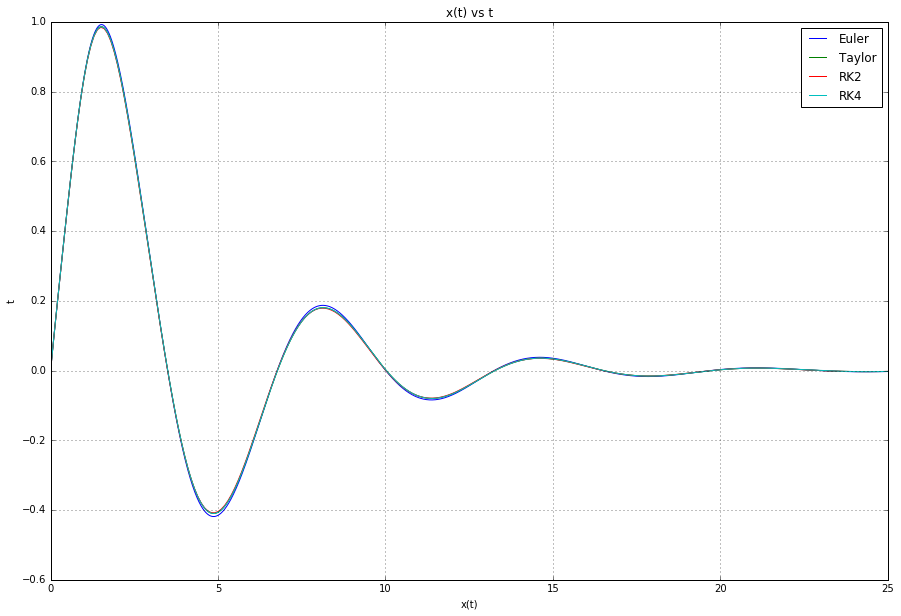

In [12]:
fig, ax = plt.subplots(figsize=(15, 10))
grid(True)
title('x(t) vs t'),xlabel('x(t)'),ylabel('t')
plot(tE,solE[:,0],label='Euler')
plot(tT,solT[:,0],Label='Taylor')
plot(tRK2,solRK2[:,0],label='RK2')
plot(tRK4,solRK4[:,0],label='RK4')
ax.legend(loc='upper right')
show()

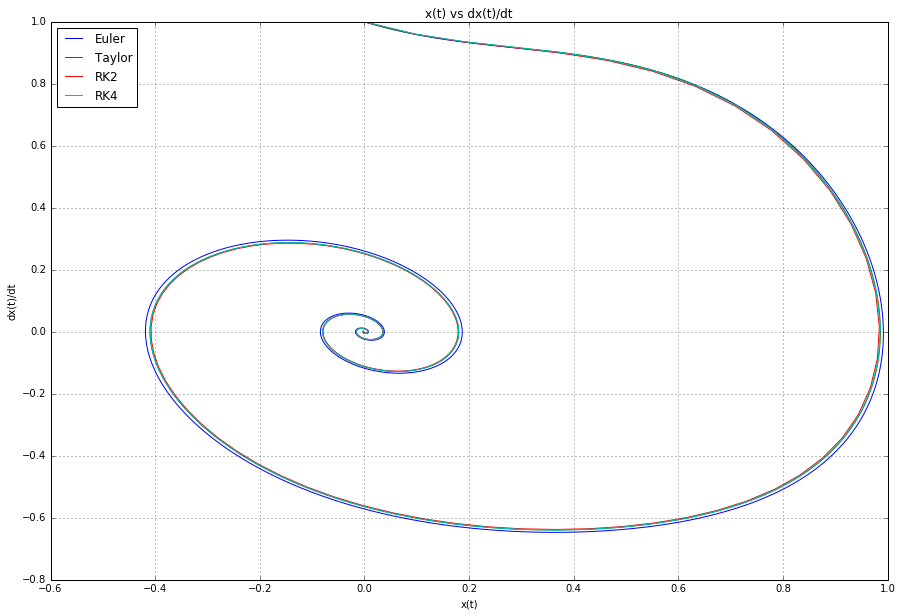

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
grid(True)
title('x(t) vs dx(t)/dt'),xlabel('x(t)'),ylabel('dx(t)/dt')
plot(solE[:,0],solE[:,1],label='Euler')
plot(solT[:,0],solT[:,1],label='Taylor')
plot(solRK2[:,0],solRK2[:,1],label='RK2')
plot(solRK4[:,0],solRK4[:,1],label='RK4')
ax.legend(loc='upper left')
show()

Aunque en todos los métodos se utilizaron pasos de $h=0.1$ a excpeción del de Euler en el que se uso uno de $h=0.001$,éste fue el único que se desvió más de los otros. La presición de los métodos de segundo orden presentan pueden ser comparados con el de cuarto orden pero el de Euler, no. Esto es apreciable tanto en el diagrama fase como en la gráfica de $x vs. t$.